In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [19]:
dataset_path ="C:/Users/DELL/Desktop/Training"

In [20]:
categories = ["glioma", "meningioma", "pituitary", "notumor"]


In [21]:
image_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}

C:\Users\DELL\AppData\Local\Temp\ipykernel_15784\1496173887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")


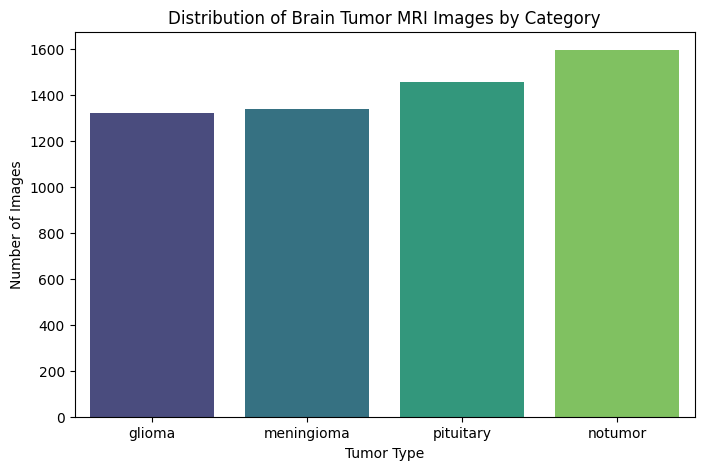

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis")
plt.title("Distribution of Brain Tumor MRI Images by Category")
plt.xlabel("Tumor Type")
plt.ylabel("Number of Images")
plt.show()

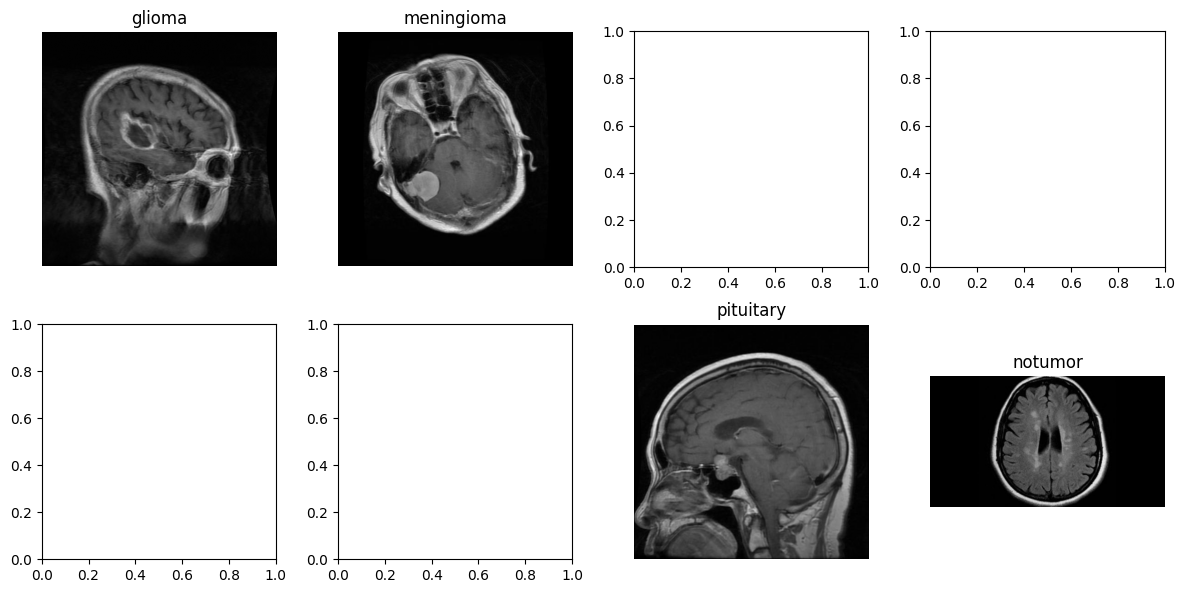

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for i, category in enumerate(categories):
    image_folder = os.path.join(dataset_path, category)
    image_files = os.listdir(image_folder)
    
    
    image_path = os.path.join(image_folder, np.random.choice(image_files))
    img = Image.open(image_path)
    
     
    ax = axes[i//2, i%4]
    ax.imshow(img, cmap="gray")
    ax.set_title(category)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
import cv2

In [ ]:
IMG_SIZE = 128  

def load_images_from_folder(folder):
    images = []
    labels = []
    
    for category in categories:
        category_path = os.path.join(folder, category)
        label = categories.index(category)  

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  
            img = img / 255.0  
            
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

X_train, y_train = load_images_from_folder("C:/Users/DELL/Desktop/Training")
X_test, y_test = load_images_from_folder("C:/Users/DELL/Desktop/Testing")

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(5712, 128, 128, 3) (5712,)
(1311, 128, 128, 3) (1311,)


In [33]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape,X_val.shape,X_test.shape)

(4569, 128, 128, 3) (1143, 128, 128, 3) (1311, 128, 128, 3)
